In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from text_models import TextClassifier, extract_text_blocks, tokenize_data, load_glove_embedding
%load_ext autoreload
%autoreload 2

In [2]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

# Load Dataset 

In [3]:
df = pickle.load( open( "gdr_assignment_labelled.pkl", "rb" ))

# Train LSTM

In [4]:
X, y, tokenizer, label_index = tokenize_data(df['pp_sent'].values, df['label'])
model_lstm = TextClassifier(tokenizer, label_index)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

history_lstm = model_lstm.train_LSTM(X_train, y_train)

W0210 23:54:15.190932 4639792576 deprecation.py:506] From /Users/kshitijsharma/Documents/CS231n/assignment2/.env/lib/python3.7/site-packages/tensorflow/python/keras/backend.py:4081: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Shape of data tensor: (8000,)
Found 3796 unique tokens.
Train on 4824 samples, validate on 536 samples
Epoch 1/5
4824/4824 [==============================] - 16s 3ms/sample - loss: 0.4554 - categorical_accuracy: 0.1457 - val_loss: 0.3860 - val_categorical_accuracy: 0.1903
Epoch 2/5
4824/4824 [==============================] - 14s 3ms/sample - loss: 0.3749 - categorical_accuracy: 0.2629 - val_loss: 0.3332 - val_categorical_accuracy: 0.4067
Epoch 3/5
4824/4824 [==============================] - 14s 3ms/sample - loss: 0.2940 - categorical_accuracy: 0.5381 - val_loss: 0.2318 - val_categorical_accuracy: 0.6959
Epoch 4/5
4824/4824 [==============================] - 14s 3ms/sample - loss: 0.1956 - categorical_accuracy: 0.7691 - val_loss: 0.1441 - val_categorical_accuracy: 0.8470
Epoch 5/5
4824/4824 [==============================] - 14s 3ms/sample - loss: 0.1197 - categorical_accuracy: 0.8758 - val_loss: 0.0890 - val_categorical_accuracy: 0.9049
Model: "sequential"
___________________________

Evaluate Model

In [5]:
test_loss, test_acc = model_lstm.evaluate(X_test,y_test, 'LSTM')
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

2640/2640 [==============================] - 2s 578us/sample - loss: 0.1008 - categorical_accuracy: 0.8754
Test Loss: 0.1007758377627893
Test Accuracy: 0.8753787875175476


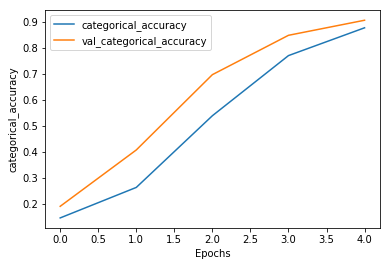

In [6]:
plot_graphs(history_lstm, 'categorical_accuracy')

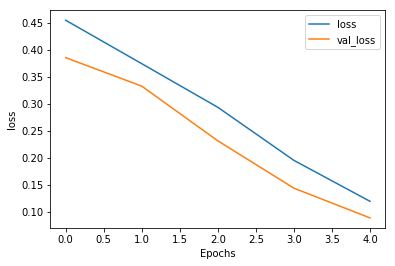

In [7]:
plot_graphs(history_lstm, 'loss')

# Train CNN

In [8]:
X, y, tokenizer, label_index = tokenize_data(df['pp_sent'].values, df['label'])
model_cnn = TextClassifier(tokenizer, label_index)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

history_cnn = model_cnn.train_CNN(X_train, y_train)

Shape of data tensor: (8000,)
Found 3796 unique tokens.
Train on 4824 samples, validate on 536 samples
Epoch 1/5
4824/4824 [==============================] - 2s 370us/sample - loss: 0.4400 - categorical_accuracy: 0.2796 - val_loss: 0.3397 - val_categorical_accuracy: 0.6493
Epoch 2/5
4824/4824 [==============================] - 2s 324us/sample - loss: 0.2347 - categorical_accuracy: 0.7995 - val_loss: 0.1132 - val_categorical_accuracy: 0.9198
Epoch 3/5
4824/4824 [==============================] - 2s 320us/sample - loss: 0.0650 - categorical_accuracy: 0.9355 - val_loss: 0.0452 - val_categorical_accuracy: 0.9478
Epoch 4/5
4824/4824 [==============================] - 2s 318us/sample - loss: 0.0276 - categorical_accuracy: 0.9579 - val_loss: 0.0318 - val_categorical_accuracy: 0.9590
Epoch 5/5
4824/4824 [==============================] - 2s 324us/sample - loss: 0.0151 - categorical_accuracy: 0.9650 - val_loss: 0.0256 - val_categorical_accuracy: 0.9664
Model: "sequential_1"
____________________

Evaluate CNN Model

In [9]:
test_loss, test_acc = model_cnn.evaluate(X_test,y_test, 'CNN')
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

2640/2640 [==============================] - 0s 69us/sample - loss: 0.0281 - categorical_accuracy: 0.9530
Test Loss: 0.02808860365414258
Test Accuracy: 0.9530302882194519


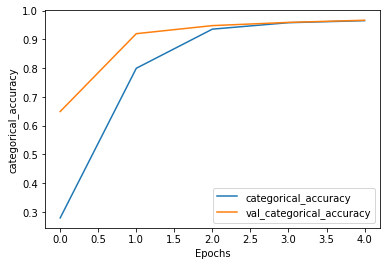

In [10]:
plot_graphs(history_cnn, 'categorical_accuracy')

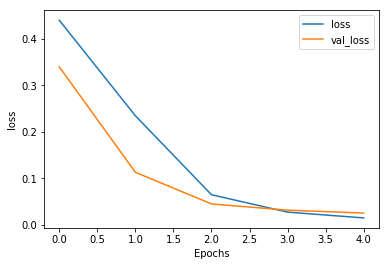

In [11]:
plot_graphs(history_cnn, 'loss')

# Train CNN Glove

In [12]:
X, y, tokenizer, label_index = tokenize_data(df['pp_sent'].values, df['label'])
model_cnn_glove = TextClassifier(tokenizer, label_index)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

history_cnn_glove = model_cnn_glove.train_CNN_Glove(X_train, y_train)

Shape of data tensor: (8000,)
Found 3796 unique tokens.
Train on 4824 samples, validate on 536 samples
Epoch 1/5
4824/4824 [==============================] - 1s 260us/sample - loss: 0.2727 - categorical_accuracy: 0.6774 - val_loss: 0.1524 - val_categorical_accuracy: 0.8489
Epoch 2/5
4824/4824 [==============================] - 1s 230us/sample - loss: 0.1170 - categorical_accuracy: 0.8711 - val_loss: 0.0962 - val_categorical_accuracy: 0.9011
Epoch 3/5
4824/4824 [==============================] - 1s 226us/sample - loss: 0.0763 - categorical_accuracy: 0.9121 - val_loss: 0.0743 - val_categorical_accuracy: 0.9272
Epoch 4/5
4824/4824 [==============================] - 1s 230us/sample - loss: 0.0548 - categorical_accuracy: 0.9359 - val_loss: 0.0611 - val_categorical_accuracy: 0.9310
Epoch 5/5
4824/4824 [==============================] - 1s 233us/sample - loss: 0.0406 - categorical_accuracy: 0.9519 - val_loss: 0.0535 - val_categorical_accuracy: 0.9328
Model: "sequential_2"
____________________

Evaluate Glove Model

In [13]:
test_loss, test_acc = model_cnn_glove.evaluate(X_test,y_test, 'CNN_Glove')
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

2640/2640 [==============================] - 0s 87us/sample - loss: 0.0607 - categorical_accuracy: 0.9144
Test Loss: 0.06071619167923927
Test Accuracy: 0.914393961429596


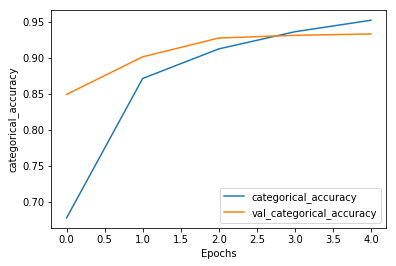

In [14]:
plot_graphs(history_cnn_glove, 'categorical_accuracy')

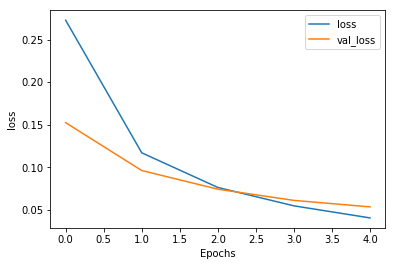

In [15]:
plot_graphs(history_cnn_glove, 'loss')

# Train MLP

In [16]:
X, y, tokenizer, label_index = tokenize_data(df['pp_sent'].values, df['label'])
model_mlp = TextClassifier(tokenizer, label_index)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

history_mlp = model_mlp.train_MLP(X_train, y_train)

Shape of data tensor: (8000,)
Found 3796 unique tokens.
Train on 4824 samples, validate on 536 samples
Epoch 1/5
4824/4824 [==============================] - 1s 117us/sample - loss: 3.1390 - categorical_accuracy: 0.1368 - val_loss: 1.0620 - val_categorical_accuracy: 0.1847
Epoch 2/5
4824/4824 [==============================] - 0s 53us/sample - loss: 1.0924 - categorical_accuracy: 0.1671 - val_loss: 0.8751 - val_categorical_accuracy: 0.1866
Epoch 3/5
4824/4824 [==============================] - 0s 56us/sample - loss: 0.8756 - categorical_accuracy: 0.1681 - val_loss: 0.7734 - val_categorical_accuracy: 0.1604
Epoch 4/5
4824/4824 [==============================] - 0s 55us/sample - loss: 0.7563 - categorical_accuracy: 0.1470 - val_loss: 0.6806 - val_categorical_accuracy: 0.1493
Epoch 5/5
4824/4824 [==============================] - 0s 41us/sample - loss: 0.6772 - categorical_accuracy: 0.1339 - val_loss: 0.6382 - val_categorical_accuracy: 0.1399
Model: "sequential_3"
________________________

Evaluate MLP Model

In [17]:
test_loss, test_acc = model_mlp.evaluate(X_test,y_test, 'MLP')
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

2640/2640 [==============================] - 0s 31us/sample - loss: 0.6399 - categorical_accuracy: 0.1470
Test Loss: 0.6399066722754276
Test Accuracy: 0.14696969091892242


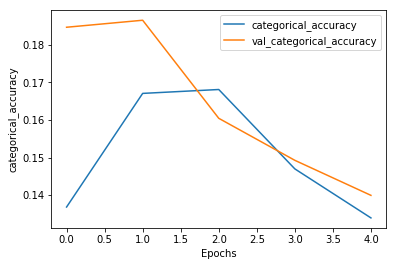

In [18]:
plot_graphs(history_mlp, 'categorical_accuracy')

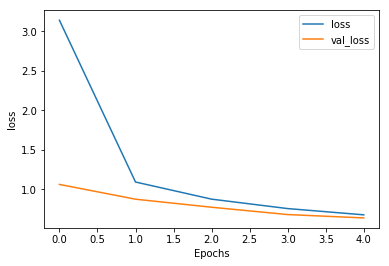

In [19]:
plot_graphs(history_mlp, 'loss')

The cross_validation function iterates over different hyper parameter settings to find the best model configuration.

In [26]:
def cross_validation(model_type, X_train, y_train, tokenizer, label_index):
    best_model = None
    learning_rates = np.linspace(1e-3, 5e-4, 5)
    regularization_strengths = np.linspace(0.001, 1.5, 5)

    best_val = -1.
    best_model = None

    for lr in learning_rates:
        for reg in regularization_strengths:
            # Train the network
            model = TextClassifier(tokenizer, label_index)
            history_mlp = model.train(X_train, y_train, model_type, learning_rate=lr, regularization=reg)
            history_mlp.history['categorical_accuracy']
            train_acc_history = history_mlp.history['categorical_accuracy']
            val_acc_history = history_mlp.history['val_categorical_accuracy']
            val_acc = val_acc_history[-1]

            if val_acc > best_val:
                best_val = val_acc
                best_model = model

            print('lr: %f, reg: %f, t_acc: %f, v_acc: %f.' % (lr, reg,  train_acc_history[-1], val_acc))

    print('Best Validation accuracy: ', best_val)
    return best_model

In [27]:
X, y, tokenizer, label_index = tokenize_data(df['pp_sent'].values, df['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

best_cnn = cross_validation("CNN", X_train, y_train, tokenizer, label_index)
best_mlp = cross_validation("MLP", X_train, y_train, tokenizer, label_index)
best_lstm = cross_validation("LSTM", X_train, y_train, tokenizer, label_index)

Shape of data tensor: (8000,)
Found 3796 unique tokens.
Train on 4824 samples, validate on 536 samples
Epoch 1/5
4824/4824 [==============================] - 3s 589us/sample - loss: 0.4393 - categorical_accuracy: 0.2890 - val_loss: 0.3369 - val_categorical_accuracy: 0.6623
Epoch 2/5
4824/4824 [==============================] - 3s 528us/sample - loss: 0.2294 - categorical_accuracy: 0.8271 - val_loss: 0.1124 - val_categorical_accuracy: 0.9011
Epoch 3/5
4824/4824 [==============================] - 3s 561us/sample - loss: 0.0652 - categorical_accuracy: 0.9283 - val_loss: 0.0472 - val_categorical_accuracy: 0.9459
Epoch 4/5
4824/4824 [==============================] - 3s 519us/sample - loss: 0.0280 - categorical_accuracy: 0.9550 - val_loss: 0.0318 - val_categorical_accuracy: 0.9534
Epoch 5/5
4824/4824 [==============================] - 2s 518us/sample - loss: 0.0156 - categorical_accuracy: 0.9646 - val_loss: 0.0260 - val_categorical_accuracy: 0.9515
Model: "sequential_59"
___________________

Evaluating Test Accuracies on the best models after cross validation and hyper parameter tuning. 

In [28]:
test_loss, test_acc = best_cnn.evaluate(X_test,y_test, 'CNN')
print('CNN: Test Loss: {}'.format(test_loss))
print('CNN: Test Accuracy: {}'.format(test_acc))

test_loss, test_acc = best_lstm.evaluate(X_test,y_test, 'LSTM')
print('LSTM: Test Loss: {}'.format(test_loss))
print('LSTM: Test Accuracy: {}'.format(test_acc))

test_loss, test_acc = best_mlp.evaluate(X_test,y_test, 'MLP')
print('MLP: Test Loss: {}'.format(test_loss))
print('MLP: Test Accuracy: {}'.format(test_acc))

2640/2640 [==============================] - 0s 139us/sample - loss: 0.0291 - categorical_accuracy: 0.9481
CNN: Test Loss: 0.029057073090789896
CNN: Test Accuracy: 0.948106050491333
2640/2640 [==============================] - 8s 3ms/sample - loss: 0.1265 - categorical_accuracy: 0.8697
LSTM: Test Loss: 0.12651652440880284
LSTM: Test Accuracy: 0.8696969747543335
2640/2640 [==============================] - 0s 63us/sample - loss: 0.4311 - categorical_accuracy: 0.1394
MLP: Test Loss: 0.43112353538021897
MLP: Test Accuracy: 0.13939394056797028


The below code block loads a review, splits it into sentences and sub-sentences, and returns a flattened list

In [29]:
data_pros_cons = pickle.load( open( "gdr_assignment_pros_cons.pkl", "rb" ))
blocks = extract_text_blocks(data_pros_cons.iloc[10,0])

# Predict CNN

The predict function takes in a list of important text blocks as input, and returns a list of useful sentences with their categories and confidence values.

In [30]:
print(best_cnn.predict(blocks, model_name='CNN'))

[([(0.68448865, 'Job Security/Advancement')], 'I worked for the internal marketing team (MarCom) on the creative side.'), ([(0.84069586, 'culture_team')], 'They do an excellent job of hiring incredibly intelligent, talented people.'), ([(0.5700997, 'wlb_working_conditions')], 'For weeks at a time you can expect late nights and no weekends.'), ([(0.5868839, 'wlb_working_conditions')], 'During downtimes it is not uncommon to go in for five hours including a long lunch and then go home.'), ([(0.7497572, 'salary_benefits')], 'In addition to this, the compensation is good.'), ([(0.9444903, 'salary_benefits')], 'The stock program is okay.'), ([(0.9462631, 'culture_team')], 'Finally, Tim Cook seems like a genuinely good person.')]


# Predict LSTM

In [31]:
print(best_lstm.predict(blocks, model_name='LSTM'))

[([(0.5287302, 'culture_team')], 'The best thing about working at Apple is your coworkers.'), ([(0.6320758, 'culture_team')], 'They do an excellent job of hiring incredibly intelligent, talented people.'), ([(0.52782285, 'salary_benefits')], 'In addition to this, the compensation is good.'), ([(0.5251931, 'culture_team')], 'Finally, Tim Cook seems like a genuinely good person.')]


# Predict MLP

In [32]:
print(best_mlp.predict(blocks, model_name='MLP'))

[]
